# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('E:\Rakamin\JAP\Mini Project\Predict Customer Clicked Ads Classification by Using Machine Learning\[TASK 1] Customer Type and Behaviour Analysis on Advertisement\Dataset\Clicked Ads Dataset.csv')
df.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
24,24,41.39,41,482736240.0,167.22,Perempuan,6/13/2016 17:27,Yes,Denpasar,Bali,Electronic
137,137,38.52,38,298068610.0,137.28,Laki-Laki,3/27/2016 23:59,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Travel
978,978,71.40,30,505322300.0,166.31,Perempuan,5/24/2016 17:07,No,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Health
919,919,65.56,25,487524450.0,181.25,Laki-Laki,1/5/2016 12:59,No,Tangerang Selatan,Banten,Health
470,470,43.84,36,494149670.0,167.42,Perempuan,6/28/2016 9:19,Yes,Tangerang Selatan,Banten,House


# EDA

Melakukan analisis Data yang akan digunakan pada Clasification

In [3]:
# informasi general tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


Berikut analisis singkat dari info data diatas:
* Data terdiri dari 1000 data
* Terdapat misisng value pada variabel Daily Time Spent on Site, Area Income, Daily Internet Usage, dan Male
* Untuk tipe data sudah sesuai 

Sebuah perusahaan ingin mengetahui apakah keefektifitas atau ketercapaian iklan yang ditayangkan untuk menarik customer.
dari data tersebut kita menggunakan machine learning untuk membantu perusahaan menentukan target customer yang tepat untuk meminimalisir pengeluaran perusahaan dari variabel/feature. feature yang akan kita gunakan yang sesuai dengan iklan yaitu:
* Age                        : Untuk mengetahui umur dari pengguna website
* Daily Time Spent on Site   : Untuk mengetahui waktu yang digunakan dalam menggunakan website dalam sehari 
* Daily Internet Usage       : Untuk mengetahui waktu penggunaan internet dalam sehari
* Timestamp                  : Untuk mengetahui waktu customer menggunakan website
* Clicked on Ad              : Untuk mengetahui apakah iklan / Ads di click atau dilihat

# Univariate Analisis 

In [4]:
# Mengambil feature yang akan digunakan pada Clasification
nums = ['Age','Daily Time Spent on Site', 'Daily Internet Usage']
cats = ['Timestamp','Clicked on Ad']
used = nums + cats

In [5]:
# menunjukkan nilai feature numerikal 
df[used].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,36.009000,8.785562,19.00,29.00,35.00,42.00,61.00
Daily Time Spent on Site,987.0,64.929524,15.844699,32.60,51.27,68.11,78.46,91.43
Daily Internet Usage,989.0,179.863620,43.870142,104.78,138.71,182.65,218.79,267.01


In [6]:
for col in nums:
  print(f'ukuran pemusatan dari kolom {col} ')
  print('mean :',df[col].mean())
  print('median :',df[col].median())
  print('modus :',df[col].mode()[0])
  print('---'*10, '\n')

ukuran pemusatan dari kolom Age 
mean : 36.009
median : 35.0
modus : 31
------------------------------ 

ukuran pemusatan dari kolom Daily Time Spent on Site 
mean : 64.92952380952391
median : 68.11
modus : 62.26
------------------------------ 

ukuran pemusatan dari kolom Daily Internet Usage 
mean : 179.86361981799803
median : 182.65
modus : 113.53
------------------------------ 



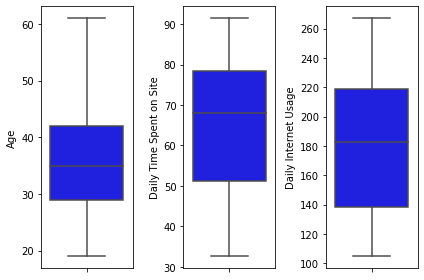

In [7]:
# box plot
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.tight_layout()

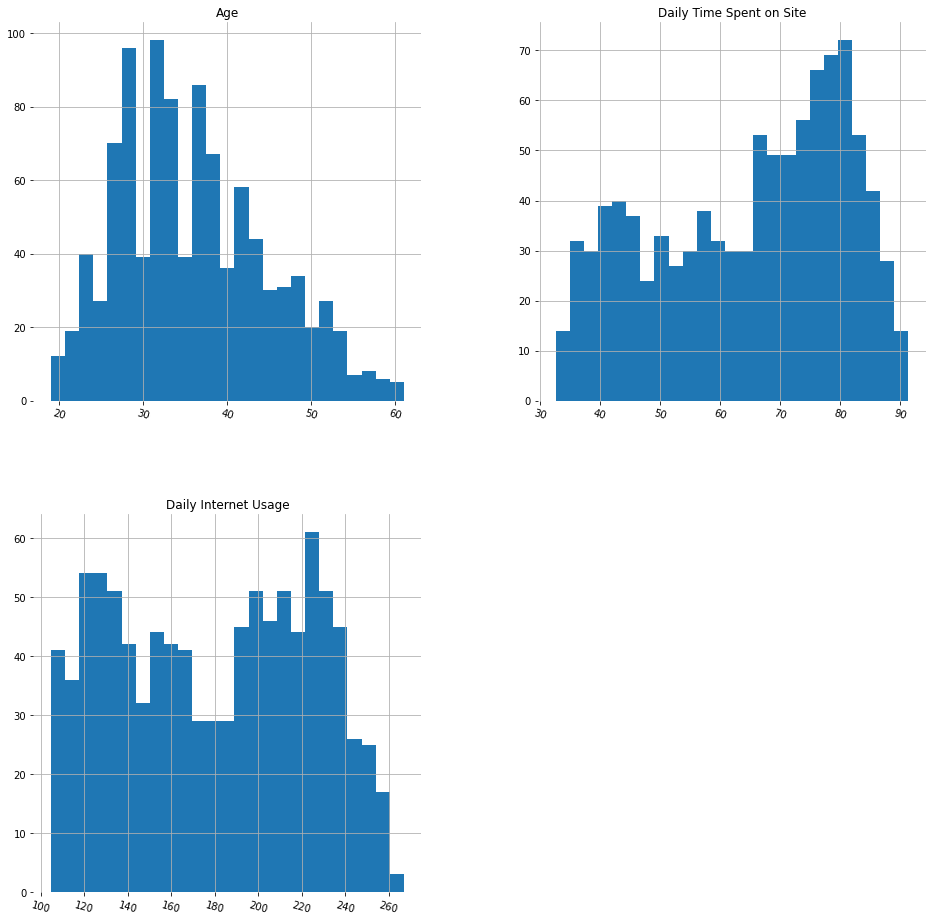

In [8]:
# histogram
h = df[nums].hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

Dapat dilihat pada nilai ukuran pemusatan bahwa ( mean > median > modus) yang berarti Age memiliki distribusi positif atau dari visualisasi box plot bahwa nilai dari age bagus tanpa outlier dan dapat dilihat pada histogram bahwa Age berdistribusi positif, untuk Daily Time Spent on Site dan Daily Internet Usage memiliki nilai yang naik turun tetapi pada box plot terlihat bahwa data yang dimiliki bagus tidak memiliki outlier dan distribusinya bersifat naik turun yaitu multinominal,
Rekomendasi pemrosesan data untuk feature ini yaitu:
* Age : Log transformation
* Daily Time Spent on Site dan Daily Internet Usage : Normalisasi

In [9]:
# menunjukkan nilai feature kategorikal ('Clicked on Ad')
df['Clicked on Ad'].value_counts()

No     500
Yes    500
Name: Clicked on Ad, dtype: int64

In [10]:
# menunjukkan nilai feature kategorical ('Timestamp'), nilai ini akan di proses untuk diambil year dan month untuk Clasification
df['Timestamp'].describe(include=object).T

count                1000
unique                997
top       5/26/2016 15:40
freq                    2
Name: Timestamp, dtype: object

In [11]:
# menunjukkan nilai kapan data terlama dan terbaru
print('tanggal terlama :',df['Timestamp'].min())
print('tanggal terbaru :',df['Timestamp'].max())

tanggal terlama : 1/1/2016 15:14
tanggal terbaru : 7/9/2016 16:23


<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

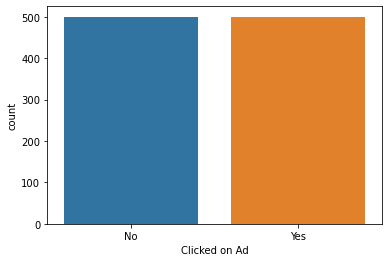

In [12]:
sns.countplot(x=df['Clicked on Ad'])

* Untuk feature kategorikal yang akan digunakan pada project ini yaitu Click on Ad dimana ini menentukan apakah iklan yang ada di website di klik atau tidak, dari plot terlihat bahwa nilai dari yes dan no sama 500
* Untuk timestamp yang menunjukkan kapan website dikunjungi yang data diambil dari 1/1/2016 hingga 7/9/2016

# Bifariate Analisis 

Feature-feature yang dipilih dilahaita hubungan antar featurenya dengan plot corelasi(heatmap) dan scater plot

<AxesSubplot:>

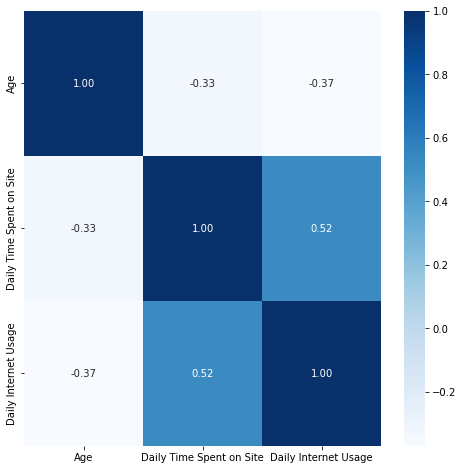

In [13]:
# correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

Dapat dilihat bahwa hubungan corelasi untuk feature numerikal Daily Time Spent on Site dan Daily Internet Usage memiliki tingkat corelasi tertinggi yaitu 0.52 yang berarti kedua feture tersebut saling berhubungan kuat

<Figure size 1080x1080 with 0 Axes>

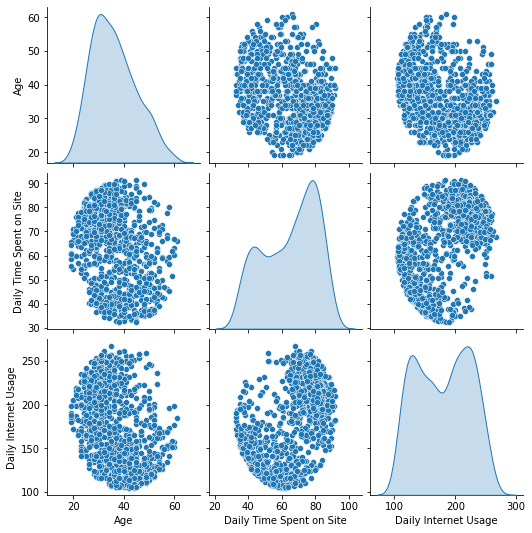

In [14]:
# di sini kita juga hanya menggunakan sample dari full dataset
plt.figure(figsize=(15, 15))
sns.pairplot(df[nums], diag_kind='kde')

Pada scater plot dapat dilihat bahwa distribusi dari setiap feature cendering normal hanya Age sedikit positif skewed

# Multivariate Analisis

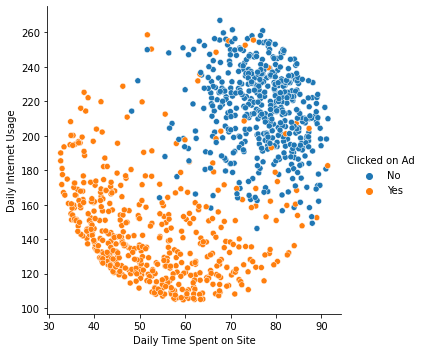

In [15]:
sns.relplot(x ="Daily Time Spent on Site", y ="Daily Internet Usage", hue ="Clicked on Ad", data = df);

Plot diatas merupakan plot dari feature dengan corelasi tertinggi yaitu Daily Time Spent on Site, Daily Internet Usage dengan feature Clicked on Ad, yang dapat dianalisis sebagai berikut:
* pada plot bahwa kebanyakan dari customer yang clik on AD Yes nilai Daily Time Spent on Site, Daily Internet Usage tidak terlalu tinggi 
* sedangkan nilai No berada pada Daily Time Spent on Site, Daily Internet Usage yang tinggi 

# Cleaning Data

Setelah menganalisis dan menentukan feature yang akan digunakna maka feature yang akan digunakan tersebut di cleanning agar hasil dari clasifikasi optimal

In [16]:
df_use = df[used]
df_use.sample(10)

,Age,Daily Time Spent on Site,Daily Internet Usage,Timestamp,Clicked on Ad
752,28,70.61,190.12,4/16/2016 5:24,No
562,44,59.52,251.08,5/27/2016 18:45,No
17,41,82.03,187.53,5/2/2016 7:00,No
502,26,66.17,228.70,5/2/2016 0:01,No
605,51,64.67,138.35,2/14/2016 16:33,Yes
563,37,62.26,166.19,5/26/2016 15:40,No
441,35,79.40,236.87,4/1/2016 9:21,No
96,36,45.72,154.02,4/19/2016 15:14,Yes
113,46,46.13,123.64,1/9/2016 5:44,Yes
180,38,39.85,145.96,1/3/2016 3:22,Yes


## Data missing

In [17]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Daily Internet Usage      989 non-null    float64
 3   Timestamp                 1000 non-null   object 
 4   Clicked on Ad             1000 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 39.2+ KB


In [18]:
# Memeriksa apakah ada data Null
df_use.isna().sum()

Age                          0
Daily Time Spent on Site    13
Daily Internet Usage        11
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [19]:
# mengisi nilia null dengan nilai modus yaitu nilai tengah agar distribusi tetap
df_use['Daily Time Spent on Site'].fillna(df_use['Daily Time Spent on Site'].mode()[0],inplace=True)
df_use['Daily Internet Usage'].fillna(df_use['Daily Internet Usage'].mode()[0],inplace=True)
df_use.isna().sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Age                         0
Daily Time Spent on Site    0
Daily Internet Usage        0
Timestamp                   0
Clicked on Ad               0
dtype: int64

Data missing pada feature Daily Time Spent on Site dan Daily Internet Usage, diisi dengan nilai modus agar nilai distribusi tidak berubah 

## Data Duplikat

In [20]:
# Memeriksa apakah terdapat data yang duplikat karena hasil false maka tidak terdapat data yang duplikat
df_use.duplicated().any()

False

In [21]:
# Memeriksa jumlah data duplikat
df_use.duplicated().sum()

0

tidak ada data duplikat pada data ini 

## Feature Engineering 

### Extract date time data 

In [22]:
df_eng = df_use.copy()

In [23]:
df_eng['Timestamp'] = df_eng['Timestamp'].astype(str) 
df_eng.head()

,Age,Daily Time Spent on Site,Daily Internet Usage,Timestamp,Clicked on Ad
0,35,68.95,256.09,3/27/2016 0:53,No
1,31,80.23,193.77,4/4/2016 1:39,No
2,26,69.47,236.50,3/13/2016 20:35,No
3,29,74.15,245.89,1/10/2016 2:31,No
4,35,68.37,225.58,6/3/2016 3:36,No


In [24]:
# Extract day, month and hour
df_eng['date'] = df_eng['Timestamp'].str.split(' ').str[0]
df_eng['time'] = df_eng['Timestamp'].str.split(' ').str[1]
df_eng['days'] = df_eng['date'].str.partition("/")[2]

df_eng['day'] = df_eng['days'].str.partition("/")[0]
df_eng['month'] = df_eng['date'].str.partition("/")[0]
df_eng['hour'] = df_eng['time'].str.partition(":")[0]

In [25]:
# Pengubahan nilai dari day, hour dan monyh agar lebih mudah untk diproses pada machine learning
df_eng['day'] = df_eng['day'].astype(np.int64)
df_eng['hour'] = df_eng['hour'].astype(np.int64)


df_eng['day_group_in_months'] = np.select([(df_eng['day'] <= 10),
                                (df_eng['day'] > 10) & (df_eng['day'] <= 20),
                                (df_eng['day'] > 20)],
                               ['awal bulan','pertengahan bulan','akhir bulan'])

df_eng['months'] = np.select([(df_eng['month'] == '1'),
                              (df_eng['month'] == '2'),
                              (df_eng['month'] == '3'),
                              (df_eng['month'] == '4'),
                              (df_eng['month'] == '5'),
                              (df_eng['month'] == '6'),
                              (df_eng['month'] == '7'),
                              (df_eng['month'] == '8'),
                              (df_eng['month'] == '9'),
                              (df_eng['month'] == '10'),
                              (df_eng['month'] == '11'),
                              (df_eng['month'] == '12')],
                              ['January','February','March','April','May','June','July','August','September','October','November','December'])

df_eng['hours_group_in_days'] = np.select([(df_eng['hour'] <= 5),
                                (df_eng['hour'] > 5) & (df_eng['hour'] <= 11),
                                (df_eng['hour'] > 11) & (df_eng['hour'] <= 17),
                                (df_eng['hour'] > 17) ],
                               ['dini hari','pagi hari','siang hari','malam hari'])

In [26]:
df_eng['Clicked on Ad'] = np.where(df_eng['Clicked on Ad'] != 'No', 1, 0)

In [27]:
df_eng.head()

,Age,Daily Time Spent on Site,Daily Internet Usage,Timestamp,Clicked on Ad,date,time,days,day,month,hour,day_group_in_months,months,hours_group_in_days
0,35,68.95,256.09,3/27/2016 0:53,0,3/27/2016,0:53,27/2016,27,3,0,akhir bulan,March,dini hari
1,31,80.23,193.77,4/4/2016 1:39,0,4/4/2016,1:39,4/2016,4,4,1,awal bulan,April,dini hari
2,26,69.47,236.50,3/13/2016 20:35,0,3/13/2016,20:35,13/2016,13,3,20,pertengahan bulan,March,malam hari
3,29,74.15,245.89,1/10/2016 2:31,0,1/10/2016,2:31,10/2016,10,1,2,awal bulan,January,dini hari
4,35,68.37,225.58,6/3/2016 3:36,0,6/3/2016,3:36,3/2016,3,6,3,awal bulan,June,dini hari


In [28]:
df_enc = df_eng.drop(['Timestamp', 'date', 'time','days', 'day', 'month', 'hour' ],axis=1)

Proses Feature enggineering untuk mengubah format data tanggal  'Timestamp' ke kategorical yang lebih mudah diproses, dan juga mengubah data Clicked on Ad agar berbentuk integer boolean

## Feature Encoding

In [29]:
# Feature encode seluruh tipe kategorical,
df_onehot = df_enc.copy()
for cat in ['day_group_in_months', 'months', 'hours_group_in_days']:
    onehots = pd.get_dummies(df_onehot[cat], prefix=cat)
    df_onehot = df_onehot.join(onehots)

In [30]:
df_onehot = df_onehot.drop(['day_group_in_months', 'months', 'hours_group_in_days'],axis=1)
df_onehot.sample(10)

,Age,Daily Time Spent on Site,Daily Internet Usage,Clicked on Ad,day_group_in_months_akhir bulan,day_group_in_months_awal bulan,day_group_in_months_pertengahan bulan,months_April,months_February,months_January,months_July,months_June,months_March,months_May,hours_group_in_days_dini hari,hours_group_in_days_malam hari,hours_group_in_days_pagi hari,hours_group_in_days_siang hari
340,47,36.31,168.92,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0
777,30,72.18,225.02,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
748,58,45.11,195.69,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
324,41,84.33,240.95,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
673,55,49.96,151.94,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0
597,37,74.84,246.44,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
743,37,62.26,105.86,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
899,45,35.66,151.72,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1
190,30,50.08,123.91,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
202,40,35.65,172.58,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [31]:
df_onehot.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,36.00900,8.785562,19.00,29.000,35.000,42.0000,61.00
Daily Time Spent on Site,1000.0,64.89482,15.744175,32.60,51.545,67.780,78.3525,91.43
Daily Internet Usage,1000.0,179.13395,44.173689,104.78,137.580,181.065,218.2875,267.01
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.000,0.500,1.0000,1.00
day_group_in_months_akhir bulan,1000.0,0.32300,0.467857,0.00,0.000,0.000,1.0000,1.00
day_group_in_months_awal bulan,1000.0,0.33800,0.473265,0.00,0.000,0.000,1.0000,1.00
day_group_in_months_pertengahan bulan,1000.0,0.33900,0.473607,0.00,0.000,0.000,1.0000,1.00
months_April,1000.0,0.14700,0.354283,0.00,0.000,0.000,0.0000,1.00
months_February,1000.0,0.16000,0.366789,0.00,0.000,0.000,0.0000,1.00
months_January,1000.0,0.14700,0.354283,0.00,0.000,0.000,0.0000,1.00


Dilakukan feature encoding untuk feature kategorik agar dapat diproses pada machine learning

# Split Data

In [32]:
df_split = df_onehot.copy()

In [33]:
# Split Feature and Label
x = df_split.drop(['Clicked on Ad'],axis=1)
y = df_split['Clicked on Ad'] # target / label

#Splitting the data into Train and Test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

Dilakukan split data dengan 30% test data dan 70 % training data

## Standarization

In [34]:
num = ['Age','Daily Time Spent on Site', 'Daily Internet Usage']

In [35]:

sc = StandardScaler()
xtrain_scaled = xtrain.copy()
xtest_scaled = xtest.copy()
xtrain_scaled[num] = sc.fit_transform(xtrain_scaled[num])
xtest_scaled[num] = sc.transform(xtest_scaled[num])

Akan dilakukan experimen dimana model yang dibuat dengan algoritma yang telah ditentukan menggunakan data training yang telah melalu proses standarisasi atau belum

# Fitting and model evaluation

## Logistic Regression

In [36]:
def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.4f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

In [37]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
eval_classification(lr, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9367
Precision (Test Set): 0.95
Recall (Test Set): 0.92
F1-Score (Test Set): 0.94
AUC: 0.98


## Standarisasi Logistic Regression

In [39]:
lr_std = LogisticRegression()
lr_std.fit(xtrain_scaled, ytrain)

LogisticRegression()

In [40]:
eval_classification(lr_std, xtrain_scaled, ytrain, xtest_scaled, ytest)

Accuracy (Test Set): 0.9400
Precision (Test Set): 0.95
Recall (Test Set): 0.93
F1-Score (Test Set): 0.94
AUC: 0.98


## Decision Tree

In [41]:
dt = DecisionTreeClassifier() 
dt.fit(xtrain, ytrain) 

DecisionTreeClassifier()

In [42]:
eval_classification(dt, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9233
Precision (Test Set): 0.92
Recall (Test Set): 0.93
F1-Score (Test Set): 0.93
AUC: 0.92


## Standarisasi Decision Tree

In [43]:
dt_std = DecisionTreeClassifier() 
dt_std.fit(xtrain_scaled, ytrain) 

DecisionTreeClassifier()

In [44]:
eval_classification(dt_std, xtrain_scaled, ytrain, xtest_scaled, ytest)

Accuracy (Test Set): 0.9167
Precision (Test Set): 0.92
Recall (Test Set): 0.92
F1-Score (Test Set): 0.92
AUC: 0.92


## K-nearest Neighbor

In [45]:
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [46]:
eval_classification(knn, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9367
Precision (Test Set): 0.95
Recall (Test Set): 0.92
F1-Score (Test Set): 0.94
AUC: 0.97


## Standarisasi K-nearest Neighbor

In [47]:
knn_std = KNeighborsClassifier()
knn_std.fit(xtrain_scaled,ytrain)

KNeighborsClassifier()

In [48]:
eval_classification(knn_std, xtrain_scaled, ytrain, xtest_scaled, ytest)

Accuracy (Test Set): 0.9267
Precision (Test Set): 0.95
Recall (Test Set): 0.90
F1-Score (Test Set): 0.93
AUC: 0.96


Setelah dilakukannya 
* experimen 1 yaitu modeling dengan data sebelum normalisasi dan 
* experimen 2 yaitu model dengan data setelah normalissasi 
* Dengan algoritma Logistic Regression, Decision tree, dan K-nearest neighbor
* didapatkan nilia bahwa Accuracy (Test Set), Precision (Test Set), Recall (Test Set), F1-Score (Test Set), dan AUC memilki nilai yang sangat tinggi yang seluruhnya memiliki nilai diatas 90 % 
* ini dimungkinkan oleh banyaknya fitur yang digunakan yang menyebabkan overfitting
* Dari hasil yang didapatkan akan dibandingkan nilai Accuracy tertinggi yang akan dilanjutkan pada analisis Confusion Matrics
* Algoritma dengan hasil accuracy tertinggi yaitu Logistic Regression yang telah terstandarisasi
* Dan algoritma yang digunakan untuk menentukan feature importance yaitu menggunakan standarisasi decision tree yang dikarenakan dua algoritma yang digunakan tidak mendukung fungsi feature importance

## Confusion Matrics

In [54]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
ypred = lr_std.predict(xtest_scaled)
confusion_matrix = metrics.confusion_matrix(ytest, ypred)

print(confusion_matrix)

[[139   7]
 [ 11 143]]


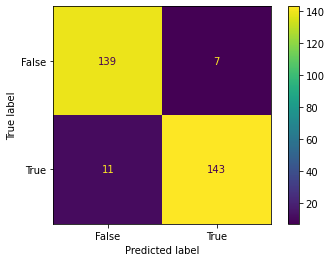

In [55]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

Dapat dilihat pada hasil Click on Ad Confusion Matrix yaitu :
(Predicted label, True Label)
* True True (TT) : merupakan prediksi benar model bahwa customer click Ad sebanyak (143)
* False False (FF) : merupakan prediksi benar model bahwa customer tidak click Ad sebanyak (139)
* False True (FT) : merupakan predisksi salah model bahwa customer tidak click Ad tetapi sebenarnya iya (11)
* True False (TF) : merupakan predisksi salah model bahwa customer click Ad tetapi sebenarnya tidak (7)


Jadi hasil akurasi dari model menggunakan algoritma Logistic Regression dengan Strndarisasi yaitu :
Accurasi = TT + FF / n_data = 143 + 139 /300 = 94%

dari hasil tersebut dapat disimpulkkan bahwa model tersebut dapat mendukung perusahaan untuk mengklasifikasi customer yang melihat iklan 

## Feature Importance

<AxesSubplot:title={'center':'Feature Importance'}>

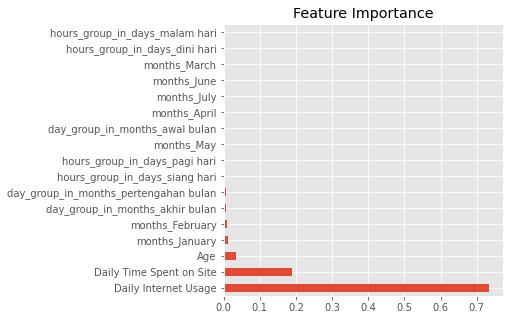

In [79]:
from sklearn.feature_selection import SelectFromModel

dt_std = DecisionTreeClassifier() 
dt_std = dt_std.fit(xtrain_scaled, ytrain) 
dt_std.feature_importances_  
model = SelectFromModel(dt_std, prefit=True)
test_X_new = model.transform(xtest_scaled)

plt.rc('figure', figsize=[5,5])
plt.style.use('ggplot')

feat_importances = pd.Series(dt_std.feature_importances_, index=xtest.columns)
feat_importances.nlargest(30).plot(kind='barh',title = 'Feature Importance')

5 feature denagn nilai Feature importance tertinggi yang didapatkan pada experimen ini yaitu : 
1. Daily Internet Usage
2. Daily Time Spent on Site 
3. Age
4. months_January
5. months_Februari 

Dari hasil tersebut kita dapat berasumsi bahwa Seberapa seringnya customer menggunakan internet sangatlah berpengaruh apakah customer akan mengunjungi iklan atau tidak, yang pastinya dilanjutkan oleh bagaiman aseringnya customer mengunjungi website perusahaan 

untuk nilai ke 3 menunjukkan bahwa usia cukup mempengaruhi bagaimana customer akan mengunjungi iklan atau tidak, dan untuk ke 4, dan ke 5 menunjukkan spesifik bulan dimana customer lebih sering untuk mengunjungi iklan

### Referensi 
* Rakamin
* https://www.ritchieng.com/machine-learning-evaluate-classification-model/
* https://www.w3schools.com/python/python_ml_confusion_matrix.asp
* https://stackoverflow.com/questions/66750706/sklearn-important-features-error-when-using-logistic-regression

Terima kasih 